<a href="https://colab.research.google.com/github/mai7266/ITEC4700/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
# My github: https://github.com/mai7266/ITEC4700

In [157]:
#1.	Where you find this data?
#UCI Machine Learning Repository

#2.	What is your Y and what are your two Xs?
# Y(Target) = G3 (Final Grade)
# X1 = studytime (Weekly study time, 1-4)
# X2 = Absences (number of school absences, continuous, 0-93)

#3.	Why you think these Xs and Y are the good selection for a regression analysis (think about which ones can be a regression)?
#Studytime reflects the student's effort and absences reflect the student's disengagement.

#4.	Why you think this is a good prediction sample?
#It demostrates how the variables can influence academic performance by the end of the year using the final grade as the target, making it a meaningful data sample for a regression model.

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("https://raw.githubusercontent.com/mai7266/ITEC4700/main/student-mat.csv", sep=";")

In [160]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [161]:
X = df[["studytime", "absences"]]
y = df["G3"]

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

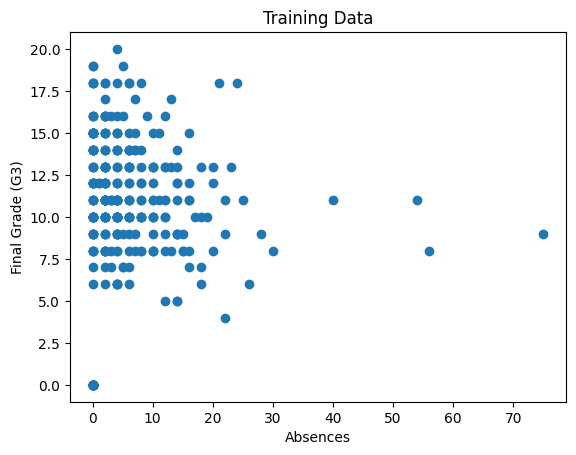

In [163]:
plt.scatter(X_train['absences'], y_train)
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.title('Training Data')
plt.show()

In [164]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [165]:
lr.coef_
lr.intercept_

np.float64(8.528619589135747)

In [166]:
x_sample = X_train.iloc[:3]
x_sample
y_sample = y_train.iloc[:3]
y_sample

,G3
181,12
194,14
173,0


In [167]:
lr.predict(x_sample).round(2)

array([10.14,  9.3 , 10.07])

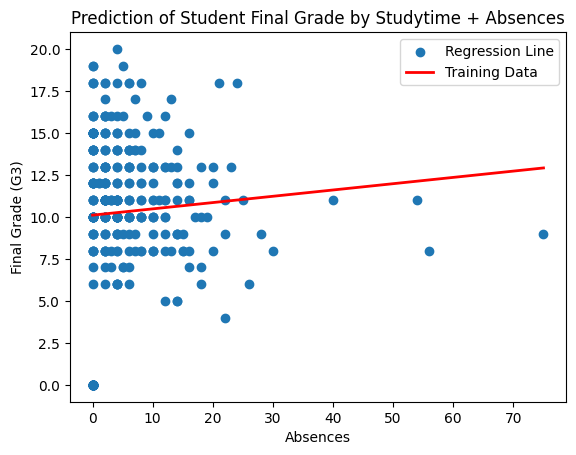

In [168]:
plt.scatter(X_train['absences'], y_train)
# Create a range of absence values for plotting the regression line
x_plot = np.linspace(X_train['absences'].min(), X_train['absences'].max(), 100)
# Predict the corresponding G3 values using the linear regression model
y_plot = lr.predict(pd.DataFrame({'studytime': X_train['studytime'].mean(), 'absences': x_plot}))

plt.plot(x_plot, y_plot, color='red', linewidth=2)
plt.xlabel("Absences")
plt.ylabel("Final Grade (G3)")
plt.title("Prediction of Student Final Grade by Studytime + Absences")
plt.legend(['Regression Line', 'Training Data'])
plt.show()

In [169]:
# This regression model predicts a student's final grade (G3) using study time and absences.
# Higher study time is associated with better grades, while absences ay reduce them.